In [23]:
import accelerator_environments
import gym
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import DDPG

In [2]:
env = gym.make("ARESExperimentalArea-Ocelot-v0")

initializing ocelot...


/home/stein/anaconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
model = DDPG("CnnPolicy", env, buffer_size=15000, verbose=2)
# model.learn(total_timesteps=500)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [7]:
model.save("model3")

In [5]:
model.load("model3")

/home/stein/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/buffers.py:199: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 9.36GB > 8.79GB
  warnings.warn(


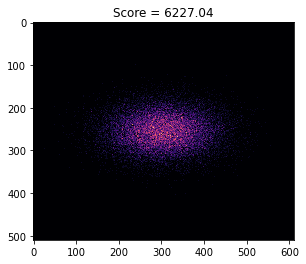

In [13]:
env.reset()
plt.imshow(env.observation, cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.observation):.2f}")
plt.show()

In [19]:
observation = env.reset()
i = 0
actions, observations = [], []
for _ in range(50):
    print(f"\rStep {i}", end="")
    observations.append(observation)
    action, _state = model.predict(observation, deterministic=True)
    print(f" -> {action}", end="")
    actions.append(action)
    observation, reward, done, info = env.step(action)
    print(f" -> {reward}")
    i += 1
    if reward == 0:
        break
observations = np.array(observations)
actions = np.array(actions)

Step 0 -> [-0.10756493 -0.47051048 -0.2880621   0.10029411 -0.28185844] -> -0.08249981067274348
Step 1 -> [-0.10734653 -0.4704094  -0.28797054  0.10013676 -0.28181267] -> 0.08285930575493694
Step 2 -> [-0.10735226 -0.47040272 -0.28797722  0.10013771 -0.28181362] -> -0.0007756632439850364
Step 3 -> [-0.10735226 -0.47040176 -0.28797722  0.10013771 -0.28181267] -> 0.0004161681617915747
Step 4 -> [-0.10735226 -0.47040176 -0.28797722  0.10013962 -0.28181267] -> 0.0


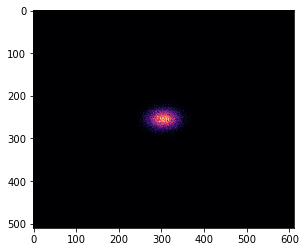

In [22]:
plt.imshow(observations[-1], cmap="magma", interpolation="None")
plt.show()

No handles with labels found to put in legend.


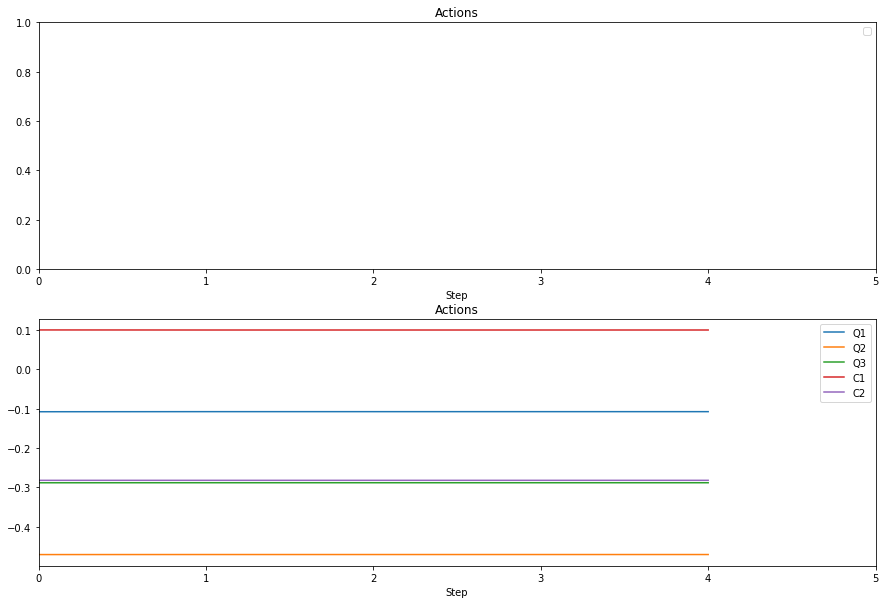

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("Actions")
plt.xlabel("Step")
plt.xlim(0,5)
# plt.plot(actions[:,0], label="x")
# plt.plot(actions[:,1], label="y")
# plt.plot(actions[:,2], label="w")
# plt.plot(actions[:,3], label="h")
plt.legend()
plt.subplot(212)
plt.title("Actions")
plt.xlabel("Step")
plt.xlim(0,5)
plt.plot(actions[:,0], label="Q1")
plt.plot(actions[:,1], label="Q2")
plt.plot(actions[:,2], label="Q3")
plt.plot(actions[:,3], label="C1")
plt.plot(actions[:,4], label="C2")
plt.legend()
plt.show()

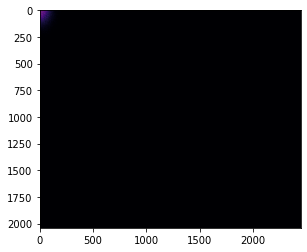

In [7]:
plt.imshow(env.screen_data, cmap="magma")
plt.show()